In [1]:
#required packages
import requests
import json
import csv

import sklearn
import pandas
import numpy
import matplotlib.pyplot

In [14]:
#getting json
def getitems(iterations):
    '''queries PoE API to collect items into a list'''
    apipath_ = "http://api.pathofexile.com/public-stash-tabs/"
    id_ = "116306827-121847288-114286128-131835488-123127819"
    items = []
    uniqueaccount = []

    for i in range(iterations):
        #get next shard
        if id_ != "":
            apipath_ += "?id=:" + id_
        r = requests.get(apipath_)

        #bad query
        if r.status_code != 200:
            print('status at request:', i+1, ':', r.status_code)
            return items

        results = json.loads(r.text)
        id_ = results['next_change_id']
        stashes = results['stashes']

        #check users
        for user in stashes:
            #public users only
            if user['accountName'] !=  None:
                #unique users
                if not(user['accountName'] in uniqueaccount):
                    uniqueaccount.append(user['accountName'])
                    items += user['items']

        apipath_ = "http://api.pathofexile.com/public-stash-tabs/"

    print('Unique users found:', len(uniqueaccount))
    print('Total items found:', len(items))
    return items

def parseweapons(items):
    '''gets only list of weapons from all item list from trading'''
    itemtable = []
    
    for item in items:
        #reset
        rarity = 'na'
        sockets = -1
        links = -1
        league = 'na'
        ilvl = -1
        phys = -1
        crit = -1
        aps  = -1
        price = 'na'
        
        #skip nonweapons
        iconurl = item['icon']
        if ('Weapons' not in iconurl):
            continue
        
        #item rarity
        if 'explicitMods' in item.keys():        
            mods = len(item['explicitMods'])
            if mods <= 2:
                rarity = 'magic'
            else:
                if 'flavourText' in item.keys():
                    rarity = 'unique'
                else:
                    rarity = 'rare'
        else:
            rarity = 'normal'
        
        #sockets
        sockets = len(item['sockets'])
        
        #links
        maxgroup = 1
        for s in item['sockets']:
            groupcount = s['group']
            if groupcount > maxgroup:
                maxgroup += 1
        links = sockets - maxgroup
        
        #league
        league = item['league']
        
        #item level
        ilvl = item['ilvl']
        
        properties = item['properties']
        
        #phys, crit, aps        
        for prop in properties:
            if prop['name'] == 'Physical Damage':
                physval = prop['values'][0][0].split('-')
                phys = (float(physval[0]) + float(physval[1]))/2
            if prop['name'] == 'Critical Strike Chance':
                crit = float(prop['values'][0][0].strip('%'))
            if prop['name'] == 'Attacks per Second':
                aps = float(prop['values'][0][0])
        
        #price
        if 'note' in item.keys():
            pricestring = item['note'].split()
            if (pricestring[0] == '~price'):
                price = pricestring
            
        itemdata = [price, rarity, sockets, links, league, ilvl, phys, crit, aps]
        itemtable.append(itemdata)
    return itemtable

In [17]:
items = getitems(1000)

Unique users found: 105
Total items found: 2677


In [18]:
#for i in range(10):
#    print(items[3])

itemdata = parseweapons(items)

In [19]:
for i in range(len(itemdata)):
    print(itemdata[i])

[['~price', '10', 'exa'], 'unique', 1, 0, 'Hardcore', 71, 41.5, 6.5, 1.31]
['na', 'rare', 2, 1, 'Hardcore', 56, 56.0, 8.0, 1.2]
['na', 'rare', 3, 1, 'Hardcore', 56, 176.5, 6.95, 1.25]
['na', 'rare', 2, 1, 'Hardcore', 64, 129.5, 5.0, 1.3]
['na', 'rare', 2, 1, 'Hardcore', 68, 169.5, 6.5, 1.3]
['na', 'unique', 2, 1, 'Hardcore', 69, 36.5, 6.5, 1.3]
['na', 'normal', 3, 2, 'Standard', 54, 36.5, 5.0, 1.3]
['na', 'rare', 1, 0, 'Hardcore', 57, 151.5, 7.45, 1.2]
['na', 'rare', 3, 2, 'Hardcore', 68, 45.5, 7.0, 1.2]
['na', 'unique', 1, 0, 'Standard', 76, 40.5, 5.0, 1.45]
['na', 'unique', 2, 1, 'Standard', 78, 76.5, 6.9, 1.32]
['na', 'unique', 3, 2, 'Standard', 67, 61.0, 6.5, 1.3]
['na', 'unique', 2, 1, 'Standard', 71, 57.0, 5.0, 1.68]
['na', 'unique', 2, 1, 'Standard', 75, 113.0, 6.0, 1.68]
['na', 'unique', 4, 2, 'Standard', 62, 169.5, 6.5, 1.38]
['na', 'unique', 2, 1, 'Standard', 78, 67.5, 6.4, 1.2]
['na', 'unique', 3, 2, 'Standard', 77, 194.0, 5.0, 1.88]
['na', 'rare', 3, 1, 'Hardcore', 52, 111.

In [77]:
def priceconvert(price):
    '''change price to chaos from list'''
    prices = dict()
    prices['chaos'] = 1
    prices['ex'] = 105
    prices['exa'] = 105
    prices['exalted'] = 105
    prices['gcp'] = 1.1
    prices['gemc'] = 1.1
    prices['fus'] = 0.6
    prices['fuse'] = 0.6
    prices['alch'] = 0.3
    prices['alchemy'] = 0.3
    prices['jew'] = 0.15
    prices['chance'] = 0.13
    prices['div'] = 19
    prices['divine'] = 19
    prices['chisel'] = 0.27
    prices['cart'] = 0.27
    prices['scour'] = 0.5
    prices['blesse'] = 0.25
    prices['regal'] = 0.52
    prices['rega'] = 0.52
    prices['regr'] = 1.1
    prices['regret'] = 1.1
    prices['vaal'] = 1.1
    
    if len(price) != 3:
        return -1
    else:
        val = float(price[1])
        if price[2] in prices:
            return val*prices[price[2]]
        else:
            return -1
        
def pricedata(items):
    '''change item prices to all chaos'''
    citem = []
    for item in items:
        price = item[0]
        features = item[1:]
        cprice = priceconvert(price)
        newf = [cprice] + features
        citem.append(newf)
    return citem

def cleanuniques(items):
    '''removes uniques'''
    nuitem = []
    for item in items:
        if item[1] != 'unique':
            nuitem.append(item)
    return(nuitem)

def listeditems(items):
    '''store only priced items'''
    pitem = []
    for item in items:
        if item[0] != -1:
            pitem.append(item)
    return pitem

In [82]:
equalval = pricedata(itemdata)
clean = cleanuniques(equalval)
priced = listeditems(clean)
priced

[[0.3, 'rare', 1, 0, 'Standard', 8, 13.5, 6.0, 1.62],
 [2.4, 'rare', 1, 0, 'Standard', 75, 95.0, 6.5, 1.3],
 [15.0, 'rare', 2, 1, 'Standard', 59, 128.5, 7.68, 1.15]]

In [83]:
import sklearn.preprocessing

In [93]:
#label encoding
data = numpy.array(priced)
y = data[:,0]
X = data[:,1:]
label = sklearn.preprocessing.LabelEncoder()

In [94]:
print(X[0])

X[:,0] = label.fit_transform(X[:,0])
X[:,3] = label.fit_transform(X[:,3])
print(X[0])

['rare' '1' '0' 'Standard' '8' '13.5' '6.0' '1.62']
['0' '1' '0' '0' '8' '13.5' '6.0' '1.62']


In [95]:
X = X.astype(float)
y = y.astype(float)
print(X)

[[   0.      1.      0.      0.      8.     13.5     6.      1.62]
 [   0.      1.      0.      0.     75.     95.      6.5     1.3 ]
 [   0.      2.      1.      0.     59.    128.5     7.68    1.15]]


In [91]:
import sklearn.decomposition
import sklearn.preprocessing

In [96]:
#PCA elimates redundant features
scaler = sklearn.preprocessing.StandardScaler()
X[:,[1,2,4,5,6,7]] = scaler.fit_transform(X[:,[1,2,4,5,6,7]])
pca = sklearn.decomposition.PCA(n_components=None)
pcaX = pca.fit_transform(X)

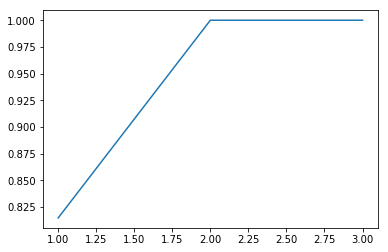

In [101]:
var = pca.explained_variance_ratio_
cvar = numpy.cumsum(var)

xrange = numpy.arange(len(cvar))
xrange = xrange + numpy.ones(len(cvar))

matplotlib.pyplot.plot(xrange, cvar, '-')
matplotlib.pyplot.show()

In [102]:
fitpca = sklearn.decomposition.PCA(n_components=2)
X = fitpca.fit_transform(X)
print(X)

[[-2.63916616 -0.79941797]
 [-0.13312128  1.4889517 ]
 [ 2.77228745 -0.68953373]]


In [104]:
print('X with PCA selected features:\n',X)
print('y values:\n', y)

X with PCA selected features:
 [[-2.63916616 -0.79941797]
 [-0.13312128  1.4889517 ]
 [ 2.77228745 -0.68953373]]
y values:
 [  0.3   2.4  15. ]


In [105]:
import sklearn.neighbors
import sklearn.ensemble
import sklearn.svm
import mpl_toolkits.mplot3d

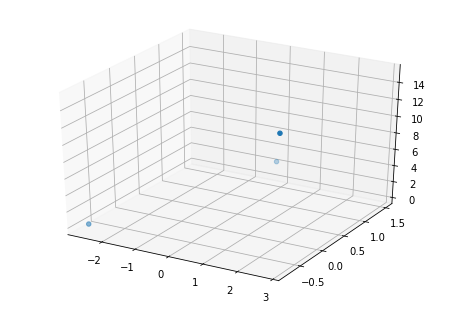

In [106]:
#visualize priced item data since we have two PCA features
figure = matplotlib.pyplot.figure()
axes = mpl_toolkits.mplot3d.Axes3D(figure)

axes.scatter(X[:,0], X[:,1], y)
matplotlib.pyplot.show()
#i wish we had more data :')

In [120]:
def plotheatmap(classifer):
    x1range = numpy.linspace(-3,3, num=100)
    x2range = numpy.linspace(-1,2, num=100)
    imgarr = []
    
    for x2 in x2range:
        row = []
        for x1 in x1range:
            point = numpy.array([x1, x2])
            point = point.reshape(1,-1)
            val = classifer.predict(point)[0]
            row.append(val)
        imgarr.append(row)
    
    matplotlib.pyplot.imshow(imgarr, extent=[-3,3,-1,2])
    matplotlib.pyplot.show()

mean squared error KNN: 0.0


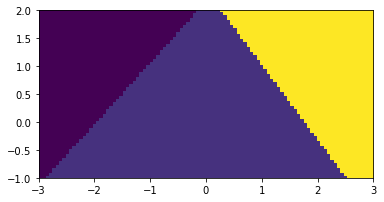

In [121]:
knnreg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)
knnreg.fit(X, y)

#if we could run for longer and collect more data, would split into test and train sets, but cant really
#split a dataset of 3 observations

yhat = knnreg.predict(X)

mse = numpy.sum((yhat - y) * (yhat - y))
print('mean squared error KNN:', mse)

plotheatmap(knnreg)

mean squared error Forest: 74.088


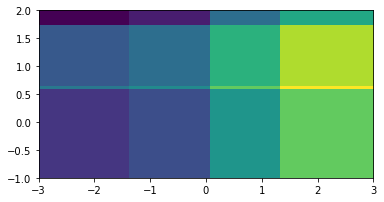

In [122]:
tree = sklearn.ensemble.RandomForestRegressor()
tree.fit(X, y)

yhat = tree.predict(X)

mse = numpy.sum((yhat - y) * (yhat - y))
print('mean squared error Forest:', mse)

plotheatmap(tree)

mean squared error SVM: 0.0216931058304


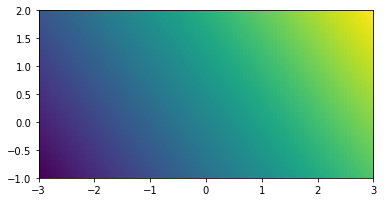

In [124]:
svm = sklearn.svm.SVR(kernel='linear')
svm.fit(X, y)

yhat = svm.predict(X)

mse = numpy.sum((yhat - y) * (yhat - y))
print('mean squared error SVM:', mse)

plotheatmap(svm)